## Recursive Feature Eliminination The process works as follows:
- An estimator is trained on the initial set of features.
- The importance of each feature is obtained from the trained estimator (e.g., through coef_ for linear models or feature_importances_ for tree-based models).
- The least important feature(s) are removed from the current set of features.
- Steps 1-3 are repeated until the desired number of features is reached.
- The sklearn.feature_selection.RFE class in scikit-learn provides an implementation of this technique.

#### How to Use sklearn.feature_selection.RFE
To use RFE, you need to provide an estimator that can assign importance to features. Common choices include:

- Linear models (e.g., LogisticRegression, LinearSVC, LinearRegression) where feature importance is derived from coefficients.

- Tree-based models (e.g., DecisionTreeClassifier, RandomForestClassifier, GradientBoostingClassifier) where feature importance is based on impurity reduction.

#### Here's a basic example demonstrating how to use RFE with a logistic regression estimator:

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE,RFECV
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=15, n_informative=5, n_redundant=2, random_state=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the estimator
estimator = LogisticRegression()

# Create the RFE object
# n_features_to_select: the number of features to select. If None, half of the features are selected.
# step: If integer, the number of features to remove at each iteration.
#       If float (0.0 < step < 1.0), the percentage of features to remove at each iteration.
rfe = RFE(estimator=estimator, n_features_to_select=5, step=1)

# Fit RFE on the training data
rfe.fit(X_train, y_train)

# Get the selected features
selected_features_mask = rfe.get_support()
selected_feature_indices = [i for i, x in enumerate(selected_features_mask) if x]

print("Selected feature indices:", selected_feature_indices)

# Transform the data to include only the selected features
X_train_selected = rfe.transform(X_train)
X_test_selected = rfe.transform(X_test)

# Train a new model with the selected features
model = LogisticRegression()
model.fit(X_train_selected, y_train)

# Evaluate the model
y_pred = model.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy with selected features:", accuracy)

# You can also access the ranking of features
# Features are ranked according to their elimination sequence.
# A feature ranked 1 is considered the most important.
print("Feature rankings:", rfe.ranking_)

Selected feature indices: [1, 2, 4, 6, 13]
Accuracy with selected features: 0.8133333333333334
Feature rankings: [ 9  1  1  2  1  5  1  8 11  6  3  4 10  1  7]


## Customizing RFE
You can customize the RFE process using the following parameters:

- estimator: The base estimator to use for ranking features.
- n_features_to_select: The desired number of features to select. If None, half of the features are selected.
- step: The number or proportion of features to remove at each iteration.

#### RFE with Cross-Validation (RFECV)
- Determining the optimal number of features to select can be challenging.
- sklearn.feature_selection.RFECV provides a way to perform RFE within a cross-validation loop to automatically find the optimal number of features based on a scoring metric.

#### Here's an example using RFECV:

Optimal number of features : 8


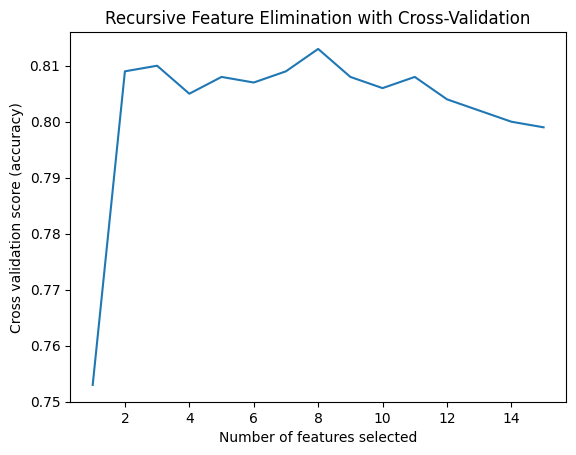

In [2]:
# Generate a synthetic dataset
X, y = make_classification(n_samples=1000, n_features=15, n_informative=5, n_redundant=2, random_state=1)

# Define the estimator
estimator = LogisticRegression()

# Create the RFECV object
# cv: Determines the cross-validation splitting strategy.
# scoring: The scoring metric to use for evaluating the model at each step.
rfecv = RFECV(estimator=estimator, step=1, cv=StratifiedKFold(5), scoring='accuracy')

# Fit RFECV on the data
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot the number of features vs. cross-validation score
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (accuracy)")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.title("Recursive Feature Elimination with Cross-Validation")
plt.show()

# Transform the data to include only the selected features
X_selected = rfecv.transform(X)

# You can now use X_selected for training your final model